# Introduction to Astropy: IV: Image coordinates

## Table of Content


IV. [Image coordinates](#Image-coordinates)
- IV.1 [Overlaying-image-coordinates](#IV.1-Overlaying-image-coordinates)
- IV.2 [Basic operations with coordinates](#IV.2-Basic-operations-with-coordinates)
- IV.3 [Coordinates and images](#IV.3-Coordinates-and-images)

XX. [References](#XX-References)


In [1]:
# As usual, we start with some imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## IV. Image coordinates

### IV.1 Overlaying image coordinates

To overlay coordinates on an image, we need to import the `WCS` module of `astropy.wcs`.

In [2]:
from astropy.wcs import WCS

In [3]:
image_file = 'HorseHead.fits'
data, header = fits.getdata(image_file, header=True)

We can check in the header that information regarding coordinates exist in there. We have seen below that the list of keywords can sometimes be very long and that it can be tedious to find the keyword of interest. Fortunately, we can filter a bit using `*` to replace characters. Things related to "object" will start with an `O` ... so let's filter this way: 

In [4]:
header['o*']

ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
OBSHA   =             0.158333 /Observation: Hour Angle                         
OBSZD   =              26.3715 /Observation: Zenith Distance                    
OBJECT  = 'data              ' /GetImage: Requested Object Name                 
OBJCTRA = '05 41 06.000      ' /GetImage: Requested Right Ascension (J2000)     
OBJCTDEC= '-02 27 30.00      ' /GetImage: Requested Declination (J2000)         
OBJCTX  =             12682.48 /GetImage: Requested X on plate (pixels)         
OBJCTY  =             20411.37 /GetImage: Requested Y on plate (pixels)         

Yeah ! Good guess, we see the object RA, DEC are there. But this is not enough, we need to know the complete coordinate transformation system.  
Now, let's check that the coordinate system and transformation (pixels -> physical coordinates) is also defined in the header. 

This information is generally located in cards starting with "C": `CTYPE`, `CRPIX`, `CRVAL`, ... :

In [5]:
header['c*']

COPYRGHT= 'AAO/ROE '           /GSSS: Copyright Holder                          
CNPIX1  =                12237 /Scan: X Corner                                  
CNPIX2  =                19965 /Scan: Y Corner                                  
CTYPE1  = 'RA---TAN          ' /GetImage: RA-Gnomic projection                  
CRPIX1  =           446.000000 /GetImage: X reference pixel                     
CRVAL1  =            85.274970 /GetImage: RA of reference pixel                 
CUNIT1  = 'deg               ' /GetImage: degrees                               
CTYPE2  = 'DEC--TAN          ' /GetImage: Dec-Gnomic projection                 
CRPIX2  =           447.000000 /GetImage: Y reference pixel                     
CRVAL2  =            -2.458265 /GetImage: Dec of reference pixel                
CUNIT2  = 'deg               ' /Getimage: degrees                               
CD1_1   =        -0.0002802651 /GetImage: rotation matrix coefficient           
CD1_2   =         0.00000031

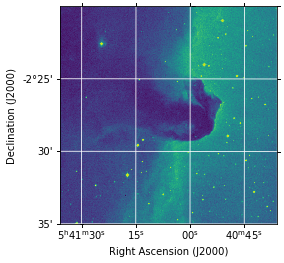

In [6]:
w = WCS(header)
ax = plt.subplot(projection=w)   # This initialises your axes transforming it to WCS 
ax.imshow(data, origin='lower')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

In [7]:
w.get_axis_types

<bound method WCS.get_axis_types of WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.59941666666666  -4.946638888888889  
CRPIX : -716.333144294269  -8444.64946698226  
PC1_1 PC1_2  : 0.015029018460682027  -9.63735777657198e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893>

You can overlay a different system of axis coordinates easily

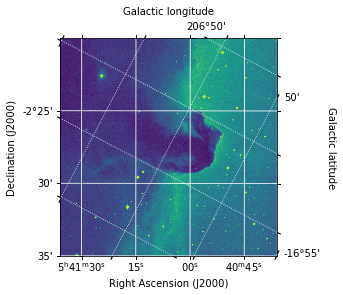

In [8]:
w = WCS(header)
ax = plt.subplot(projection=w)   # This initialises your axes transforming it to WCS 
ax.imshow(data, origin='lower')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Galactic longitude')
overlay[1].set_axislabel('Galactic latitude')

You may want to refine a bit the labeling of the axis (let's drop here the galactic coordinates for clarity)

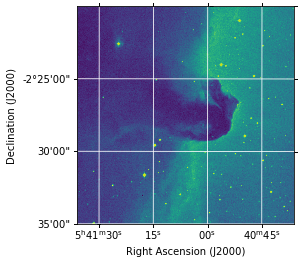

In [9]:
w = WCS(header)
ax = plt.subplot(projection=w)
ax.imshow(data, origin='lower')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

cRA = ax.coords[0]
cDEC = ax.coords[1]
cRA.set_major_formatter('hh:mm:ss')
cDEC.set_major_formatter('dd:mm:ss')
plt.show()

For more options regarding fine tuning of your grid overlay, you may consult: http://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html . 

Let's note that there is another powerful (astropy-affiliated) package (developped by Robitaille and Bressert) that allows coordinate overlays with a lot of functionalities, checking for you the coordinate system and equinox, and all that with a somehow more simple syntax (but new objects): `aplpy`.   

In [ ]:
img.add_grid()

INFO: Auto-setting vmin to  4.891e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.907e+04 [aplpy.core]


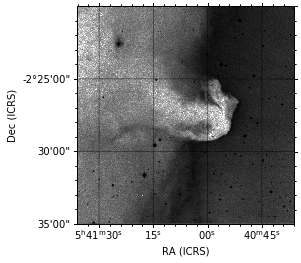

In [14]:
#!pip install aplpy  # If aplpy is not installed  ; 
# If installation of aplpy fails with "python setup.py egg_info" failed with error code 1, maybe a fix could be to install setuptools pip install -U setuptools
# Have a look to https://aplpy.github.io/
import aplpy
fig = plt.figure()
img = aplpy.FITSFigure(image_file, figure=fig)
img.show_grayscale(stretch='arcsinh', invert=True)
img.tick_labels.set_xformat('hh:mm:ss')
img.tick_labels.set_yformat('dd:mm:ss')
img.add_grid()
img.grid.set_color('black')
img.grid.set_alpha(0.5)

### IV.2 Basic operations with coordinates

To use those coordinates and calculate e.g. separations between objects, we need to import `SkyCoord` module from `astropy.coordinates`. In addition, as "coordinates" always have units attached, we need to import `astropy.units` that will allow us to work with "unit-attached quantities".

In [15]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [16]:
# Coordinates can be instanciated in various ways
# E.g. giving the coordinate in degree
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

But you can also explicitly attach the units to your variable using: `u.degree`

In [17]:
RA, DEC = 10.625*u.degree, 41.2*u.degree
c = SkyCoord(ra=RA, dec=DEC, frame='icrs')
print('(RA, DEC) = ', RA, DEC)
print('c', c)

(RA, DEC) =  10.625 deg 41.2 deg
c <SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>


I always have hard time playing with units in degree ... I prefer `hh:mm:ss` / `dd:mm:ss`. No problem:

In [18]:
c = SkyCoord('00h42.5m', '+41d12m')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

You can specify explictly that your coordinates is effectively ICRS ([International Celestial Reference System](https://en.wikipedia.org/wiki/International_Celestial_Reference_System)) -i.e. this is almost Equatorial J2000- using the optional argument `frame`. If not, you can specify the system through the argument `frame` (e.g. galactic, FK5, ...). 

Note that if you give RA, DEC and specify `frame=galactic`, RA and DEC will be converted and galactic coordinates will be stored. You need to specify arguments `l=my_galactic_longitude, b=my_galactic_latitude` to get the coordinates read as a longitude/latitude. 

In [19]:
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>


Another possibility is to do the following:

In [20]:
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

In [21]:
c = SkyCoord('5h40m50s', '-2d27m26s')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (85.20833333, -2.45722222)>

Once you have a coordinate object you can now access the components of that coordinate (e.g. RA, Dec) and get a specific string representation of the full coordinate.

In [22]:
c.ra 

<Longitude 85.20833333 deg>

In [23]:
c.ra.hour  

5.680555555555556

In [24]:
c.ra.hms  

hms_tuple(h=5.0, m=40.0, s=50.000000000002274)

In [25]:
c.dec.radian

-0.04288661823094955

Coordinates can easily be converted to strings using the `to_string()` method:

In [26]:
print('c.to_string(\'decimal\') ->', c.to_string('decimal') )
print('c.to_string(\'dms\')     ->', c.to_string('dms') )
print('c.to_string(\'hmsdms\')  ->', c.to_string('hmsdms') )

c.to_string('decimal') -> 85.2083 -2.45722
c.to_string('dms')     -> 85d12m30s -2d27m26s
c.to_string('hmsdms')  -> 05h40m50s -02d27m26s


And if you want to know your coordinate in another coordinate system:

In [27]:
print(c.galactic )
print('A more flexible way is to use transform_to:')
print(c.transform_to('galactic'))

<SkyCoord (Galactic): (l, b) in deg
    (206.93693658, -16.80792534)>
A more flexible way is to use transform_to:
<SkyCoord (Galactic): (l, b) in deg
    (206.93693658, -16.80792534)>


Transform to 'FK5' and change to get coordinates for an old J1950 equinox. 

In [28]:
from astropy.coordinates import FK5
c_fk5 = c.transform_to('fk5')
print('coord J2000:', c_fk5)
c_J1950 = c_fk5.transform_to(FK5(equinox='J1950'))  # precess to a different equinox 
print('coord, J1950', c_J1950)

coord J2000: <SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (85.20833957, -2.45722752)>
coord, J1950 <SkyCoord (FK5: equinox=J1950.000): (ra, dec) in deg
    (84.57981628, -2.48199994)>


### IV.3 Coordinates and images

Let's now see how to overlay a symbol on an image at a specific position.    
Let's work with the image of the Horse Head nebula again. Remember that we have done:
``` python
data, header = fits.getdata(image_file, header=True)
w = WCS(header)
```

In [29]:
# Let's look to some pixel coordinates of interest
pixcrd = np.array([[500, 300], [224, 438]], np.float_)

# Convert pixel coordinates to world coordinates
# The second argument is "origin" -- in this case we're declaring we
# have 1-based (Fortran-like) coordinates.
world = w.wcs_pix2world(pixcrd, 1)
print(world)

[[85.25980255 -2.49940927]
 [85.33727123 -2.46088178]]


You can now convert those coordinates into `SkyCoord` instances:

In [30]:
world_SC = [SkyCoord(wc[0], wc[1], unit='deg') for wc in world]
world_SC

[<SkyCoord (ICRS): (ra, dec) in deg
     (85.25980255, -2.49940927)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (85.33727123, -2.46088178)>]

You can also measure the separation between those two pixels ... 

In [31]:
world_SC[0].separation(world_SC[1])

<Angle 0.08645534 deg>

... and convert this into arcseconds. 
The separation is an angle and you can convert it to other angular units using the method `to(newunits)`:

In [32]:
world_SC[0].separation(world_SC[1]).to(u.arcsec)

<Angle 311.2392089 arcsec>

Now you can also overlay those to pixels on your image (but you simply have to give their pixel coordinates ... nothing fancy in there !). Conversely, you may want to see to which pixel corresponds a specific coordinate. You therefore need to use a `wcs.WCS` method to convert a coordinate into pixel.  

In [33]:
w.wcs_world2pix( world_SC[0].ra.value, world_SC[0].dec.value, 1 )  
# Again 1 is here to fix the origin of the coordinate system 

[array(500.), array(300.)]

Note that above, we have used taken the "unitless" value of the `RA` and `DEC`. For this purpose, we have used the `units` method `value` to extract only the numerical value of `RA`/`DEC` as given by `world_SC[0].ra`/`world_SC[0].dec`.   

In [34]:
print(world_SC[0].ra.value, world_SC[0].dec.value)
print(85.2598025546, -2.49940926988)

85.25980255461644 -2.4994092698789343
85.2598025546 -2.49940926988


[array(607.86614049), array(500.0543333)]


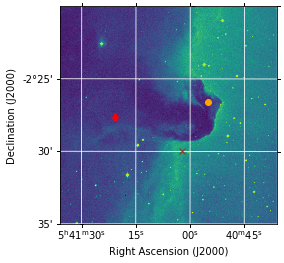

In [35]:
w = WCS(header)
ax = plt.subplot(projection=w)
ax.imshow(data, origin='lower')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

mrk = ['x', 'd']
[ax.plot(px[0], px[1], marker=mrk[i], color='red') for i, px in enumerate(pixcrd)]


newpx = w.wcs_world2pix(85.2296, -2.4434, 1)
print(newpx)
ax.plot(newpx[0], newpx[1], marker='o', color='orange')

## Credits:

If you use Astropy directly—or as a dependency to another package—for your work, please remember to include the following acknowledgment at the end of papers:

*This research made use of Astropy, a community-developed core Python package for Astronomy (Astropy Collaboration, 2013).*

Where the astropy paper is 2013, A&A, 558, 33 http://adsabs.harvard.edu//abs/2013A%26A...558A..33A

## XX References

This notebook is mostly based on the astropy tutorials available here: http://www.astropy.org/astropy-tutorials/

- Your reference for using astropy should be the online documentation http://docs.astropy.org/en/latest

- Documentation regarding the wcs module: http://docs.astropy.org/en/stable/visualization/wcsaxes/

- Documentation regarding the use of coordinates: http://docs.astropy.org/en/stable/coordinates/index.html

- The doc of astropy.io.fits also provides relevant information: http://docs.astropy.org/en/stable/io/fits/#f1

- Calabreta and Greisen 2002, A&A 395, 1077, Representations of celestial coordinates in FITS http://adsabs.harvard.edu/abs/2002A%26A...395.1077C

- Regarding `Table` objects and dealing with various i/o within astropy, you should consult those chapters of the doc: http://docs.astropy.org/en/stable/io/unified.html#table-io  and http://docs.astropy.org/en/stable/table/io.html 

- For an in-depth discussion of `Quantity` objects, see the [astropy documentation section](http://docs.astropy.org/en/stable/units/quantity.html). See also http://docs.astropy.org/en/stable/units/ for various informations of interest regarding the use of units in general !

- How bad is your color map ? (aka how not to be fooled by a poor choice of color map): https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

- Github link to astropy tutorial notebooks: https://github.com/astropy/astropy-tutorials/tree/master/tutorials/